<h2><center>Project 1</center></h2>

In [990]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<h3><center>Introduction</center></h3>
<b>What is heart attack?</b>

A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn’t get enough blood.

The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.

Coronary artery disease (CAD) is the main cause of heart attack. A less common cause is a severe spasm, or sudden contraction, of a coronary artery that can stop blood flow to the heart muscle (Centers for Disease Control and Prevention).

The dataset was taken from the Kaggle repository. <b>The link to the source:</b> https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


In [991]:
df = pd.read_csv('heart.csv')
df['sex'].replace(1, 'Male',inplace=True)
df['sex'].replace(0, 'Female',inplace=True)

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


<b>Dataset description</b>

Age : age of the patient

Sex : sex of the patient

exng: exercise induced angina (1 = yes; 0 = no)

oldpeak - previous peak

slp - slope

caa: number of major vessels (0-3)

thall - Thalium Stress Test result ~ (0,3)

cp : chest pain type

<ul><li>Value 0: typical angina</li>
<li>Value 1: atypical angina</li>
<li>Value 2: non-anginal pain</li> 
<li>Value 3: asymptomatic</li>
</ul>

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg : resting electrocardiographic results

<ul><li>Value 0: normal</li> 
    <li>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)</li> 
    <li>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</li>
</ul>

thalachh : maximum heart rate achieved

output : 0= less chance of heart attack 1= more chance of heart attack

In [992]:
print(f'The types of data\n{df.dtypes}\n\n')
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The types of data
age           int64
sex          object
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


The dataset has 303 rows and 14 columns


There are <b>categorical</b> variable (sex), <b>discrete</b> numerical variables (cp, fbs, restecg, exng, slp, caa, thall, output) and <b>continuous</b> numerical variable (age, oldpeak, trtbps, chol, thalachh)

From the dataset it can be seen that there is <b>no missing values</b>

In [993]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


Outliers are extreme values that differ from most other data points in a dataset. They can have a big impact on your statistical analyses and skew the results of any hypothesis test (scribbr.com). We need to plot box plots to find outliers located outside the whiskers and remove them.<br><br>

Apart from that, the normality of <b>continuous variables</b> needs to be checked to conduct parametric or non-parametric statistical tests. One of the tests from scipy library to check if the data is normally distributed is Shapiro-Wilk test (pyshark.com)

H0: distribution of the sample is not significantly different from a normal distribution

H1: distribution of the sample is significantly different from a normal distribution<br><br>

Choose threshold as 5%



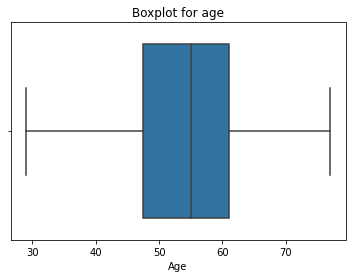

In [994]:
plot=sns.boxplot(df['age'])
plt.title('Boxplot for age')
plt.xlabel('Age')

plt.show()

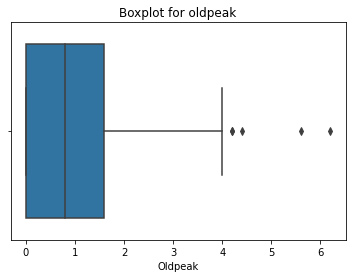

In [995]:
plot=sns.boxplot(df['oldpeak'])
plt.title('Boxplot for oldpeak')
plt.xlabel('Oldpeak')

plt.show()

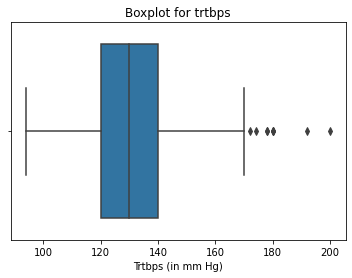

In [996]:
plot=sns.boxplot(df['trtbps'])
plt.title('Boxplot for trtbps')
plt.xlabel('Trtbps (in mm Hg)')

plt.show()

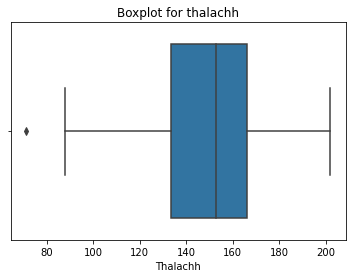

In [997]:
plot=sns.boxplot(df['thalachh'])
plt.title('Boxplot for thalachh')
plt.xlabel('Thalachh')

plt.show()

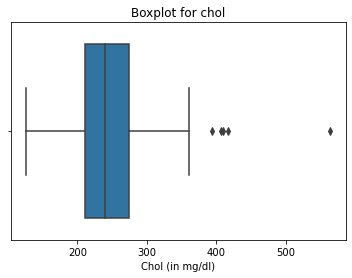

In [998]:
plot=sns.boxplot(df['chol'])
plt.title('Boxplot for chol')
plt.xlabel('Chol (in mg/dl)')

plt.show()

There are outliers in oldpeak, trtbps, thalachh, chol columns. We will remove them using measure of statistical dispersion - the interquartile range (IQR).

In [999]:
q1 = df['oldpeak'].quantile(0.25)
q3 = df['oldpeak'].quantile(0.75)
IQR = q3 - q1    

outlier = (df['oldpeak'] >= q1 - 1.5*IQR)&(df['oldpeak'] <= q3 + 1.5*IQR)

df_new=df.loc[outlier]   

In [1000]:
q1 = df['trtbps'].quantile(0.25)
q3 = df['trtbps'].quantile(0.75)
IQR = q3 - q1    

outlier = (df['trtbps'] >= q1 - 1.5*IQR)&(df['trtbps'] <= q3 + 1.5*IQR)

df_new=df.loc[outlier] 

In [1001]:
q1 = df['thalachh'].quantile(0.25)
q3 = df['thalachh'].quantile(0.75)
IQR = q3 - q1    

outlier = (df['thalachh'] >= q1 - 1.5*IQR)&(df['thalachh'] <= q3 + 1.5*IQR)

df_new=df.loc[outlier]  

In [1002]:
q1 = df['chol'].quantile(0.25)
q3 = df['chol'].quantile(0.75)
IQR = q3 - q1     

outlier = (df['chol'] >= q1 - 1.5*IQR)&(df['chol'] <= q3 + 1.5*IQR)

df_new=df.loc[outlier]    

In [1003]:
df = df_new
print('Outliers were removed')

Outliers were removed


In [1004]:
if (stats.shapiro(df['age'])[1] < 0.05):
    print("Reject null hypothesis - continuous numerical variable 'age' is not normal")
else:
    print("Accept null hypothesis - continuous numerical variable 'age' is normal")

Reject null hypothesis - continuous numerical variable 'age' is not normal


In [1005]:
if (stats.shapiro(df['oldpeak'])[1] < 0.05):
    print("Reject null hypothesis - continuous numerical variable 'oldpeak' is not normal")
else:
    print("Accept null hypothesis - continuous numerical variable 'oldpeak' is normal")

Reject null hypothesis - continuous numerical variable 'oldpeak' is not normal


In [1006]:
if (stats.shapiro(df['trtbps'])[1] < 0.05):
    print("Reject null hypothesis - continuous numerical variable 'trtbps' is not normal")
else:
    print("Accept null hypothesis - continuous numerical variable 'trtbps' is normal")

Reject null hypothesis - continuous numerical variable 'trtbps' is not normal


In [1007]:
if (stats.shapiro(df['thalachh'])[1] < 0.05):
    print("Reject null hypothesis - continuous numerical variable 'thalachh' is not normal")
else:
    print("Accept null hypothesis - continuous numerical variable 'thalachh' is normal")

Reject null hypothesis - continuous numerical variable 'thalachh' is not normal


In [1008]:
if (stats.shapiro(df['chol'])[1] < 0.05):
    print("Reject null hypothesis - continuous numerical variable 'chol' is not normal")
else:
    print("Accept null hypothesis - continuous numerical variable 'chol' is normal")


Accept null hypothesis - continuous numerical variable 'chol' is normal


Research questions:
1. In terms of average level of cholestrol do people with a higher probability of heart attack differ from the ones having the lower probability?
2. Do women and men aged older than the middle age of the corresponding genders have more chances of heart attack than females and males younger these ages?
3. When considering people with asymptomatic chest pain type, what is the difference between males and females in mean resting blood pressure?

<h3><center>Analysis</center></h3>

1. In terms of average level of cholestrol do people with a higher probability of heart attack differ from the ones having the lower probability? 

<b>Null hypothesis:</b> There is no difference between given two groups in terms of average level of cholestrol <br>
<b>Alternate hypothesis:</b> There is difference between given two groups in terms of average level of cholestrol

Choose threshold as 5%. 

A p-value larger than a chosen threshold indicates that our observation is not so unlikely to have occurred. If the threshold is greater than p-value, then we have evidence against the null hypothesis.

Here, since we have already checked continuous variable <b>chol</b> for normality (which is normally distributed) we can use parametric statistical test, specifically, independent samples t-test.

In [1017]:
df_high_probability_heart_attack = df[df['output'] == 1]
df_low_probability_heart_attack = df[df['output'] == 0]

print(stats.ttest_ind(df_high_probability_heart_attack['chol'], df_low_probability_heart_attack['chol'], equal_var = 1))

Ttest_indResult(statistic=-2.0222507906656726, pvalue=0.0440496200017402)


After calculating the T-test for the means of two independent samples of scores, we produced a result of pvalue = 0.044 which is less than the set threshold value (0.05).

Therefore, we should reject null hypothesis and, thereby, <b>there is</b> difference between groups of people with more chance of heart attack and less chance of heart attack in terms of average level of cholestrol

2. Do women and men aged older than the middle age of the corresponding genders have more chances of heart attack than females and males younger these ages?

In [1010]:
males_overall = df[df['sex'] == 'Male']['output'].count()
males_heart_attack = df[(df['output'] == 1) & (df['sex'] == 'Male')]['output'].count()
males_older_middle = df[(df['age'] > df['age'].mean()) & (df['sex'] == 'Male')].set_index('output').groupby(level=0)['sex'].agg({np.size})
males_younger_middle = df[(df['age'] < df['age'].mean()) & (df['sex'] == 'Male')].set_index('output').groupby(level=0)['sex'].agg({np.size})
males_middle = df[df['sex'] == 'Male']['age'].mean()



females_overall = df[df['sex'] == 'Female']['output'].count()
females_heart_attack = df[(df['output'] == 1) & (df['sex'] == 'Female')]['output'].count()
females_older_middle = df[(df['age'] > df['age'].mean()) & (df['sex'] == 'Female')].set_index('output').groupby(level=0)['sex'].agg({np.size})
females_younger_middle = df[(df['age'] < df['age'].mean()) & (df['sex'] == 'Female')].set_index('output').groupby(level=0)['sex'].agg({np.size})
females_middle = df[df['sex'] == 'Female']['age'].mean()

print(f'Total number of men in the dataset is {males_overall} with {males_heart_attack} males who had heart attack.\n'
      f'{round(males_older_middle.iloc[1,0]*100/(males_older_middle.iloc[0,0]+males_older_middle.iloc[1,0]), 3)}% of males, older than the middle age ({round(males_middle, 3)} years), had heart attack.\n'
      f'On the other hand, {round(males_younger_middle.iloc[1,0]*100/(males_younger_middle.iloc[0,0]+males_younger_middle.iloc[1,0]), 3)}% of males, younger than the middle age, had heart attack.\n\n')

print(f'Total number of women in the dataset is {females_overall} with {females_heart_attack} females who had heart attack.\n'
      f'{round(females_older_middle.iloc[1,0]*100/(females_older_middle.iloc[0,0]+females_older_middle.iloc[1,0]), 3)}% of females, older than the middle age ({round(females_middle, 3)} years), had heart attack.\n'
      f'On the other hand, {round(females_younger_middle.iloc[1,0]*100/(females_younger_middle.iloc[0,0]+females_younger_middle.iloc[1,0]), 3)}% of females, younger than the middle age, had heart attack.')


Total number of men in the dataset is 207 with 93 males who had heart attack.
30.097% of males, older than the middle age (53.758 years), had heart attack.
On the other hand, 59.615% of males, younger than the middle age, had heart attack.


Total number of women in the dataset is 91 with 69 females who had heart attack.
60.784% of females, older than the middle age (55.297 years), had heart attack.
On the other hand, 95.0% of females, younger than the middle age, had heart attack.


<br>
<br>
Therefore, women and men aged older than the middle age of the corresponding genders have <b>less chances</b> of heart attack than females and males younger these ages.

<br>
<br>
3. When considering people with asymptomatic chest pain type, what is the difference between males and females in mean resting blood pressure?

<b>Null hypothesis:</b> Males and Females with asymptomatic chest pain have equal resting blood pressure means <br>

<b>Alternate hypothesis:</b> Males and Females with asymptomatic chest pain have not equal resting blood pressure means <br><br>

Choose threshold as 5%.

Since continuous variable <b>trtbps</b> is not normally distributed, we cannot use parametric statistical test. Instead, we should use non-parametric test, specifically, Mann-Whitney U test (pyshark.com).

In [1011]:
males_with_asymptomatic = df[(df['sex'] == 'Male') & (df['cp'] == 3)]
females_with_asymptomatic = df[(df['sex'] == 'Female') & (df['cp'] == 3)]


print(stats.mannwhitneyu(males_with_asymptomatic['trtbps'], females_with_asymptomatic['trtbps']))

MannwhitneyuResult(statistic=26.5, pvalue=0.18548650613376405)


After calculating the Mann-Whitney U test for the means of two independent samples of scores, we produced a result of pvalue = 0.185 which is greater than the set threshold value (0.05).<br><br>
Therefore, we should accept null hypothesis and, thereby, males and females with asymptomatic chest pain have equal resting blood pressure means.<br><br><br>

For additional information, here I plotted correlation matrix to show the correlations between features.<br><br>
The darker the shade is, the stronger correlation. 

<AxesSubplot:title={'center':'Correlation matrix'}>

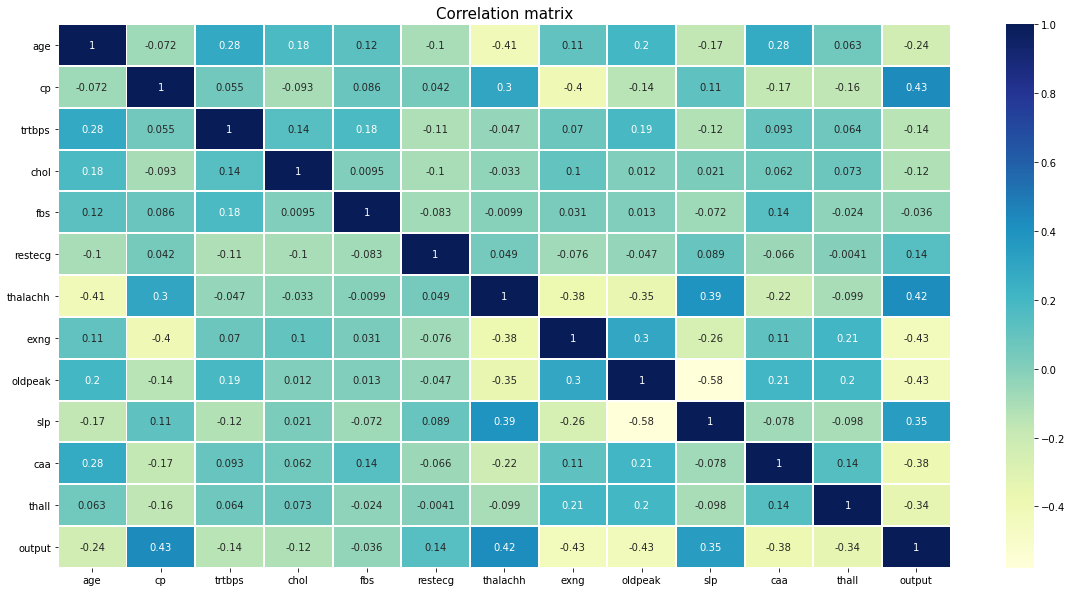

In [1016]:
plt.figure(figsize = (20, 10))
plt.title("Correlation matrix",fontsize = 15)

sns.heatmap(df.corr(),cmap = "YlGnBu",linewidth=1, annot= True)

<h3><center>Discussion and Conclusion</center></h3>

1. In the first research question I had to test the hypothesis that in terms of average level of cholesterol people with more chance of heart attack differ from the ones with less chance. To answer this question, I used parametrical statistical test, specifically, independent samples t-test. However, to use the test the normality of considered data should be confirmed. In the Introduction part, I used boxplots and interquartile ranges to remove outliers from the continuous variables and Shapiro-Wilk test to check if the data is normally distributed. The outliers were removed from oldpeak, trtbps, thalachh, chol columns and it turned out that among all continuous variables only chol variable is normal. After conducting normality test, first research question was answered. Since chol data is normally distributed I implemented independent samples t-test from scipy library. Comparing the pvalue to the given threshold of 0.05, I’ve found out that there is significant difference between groups of people with more chance of heart attack and less chance of heart attack in terms of average level of cholesterol.<br><br>
In the second research question I had to compare the respondents of both genders aged older than own corresponding middle ages with the people aged younger those ages and find out who have higher probability of heart attack. The result was astonishing since young people had higher chances of heart attack which was not expected.<br><br>
In the third question I had to compare mean resting blood pressures between genders with asymptomatic chest pain type. In order to approach this question, I used inferential procedure non-parametric test, specifically, Mann-Whitney U test. Since the considered variable is not normally distributed, it is possible. Also, this test can be found in scipy library. Comparing the pvalue to the given threshold of 5%, it was found out that males and females with asymptomatic chest pain have equal resting blood pressure means.<br><br><br><br>

2.	In some parts the time of running the code was slow and, moreover, the code was not efficiently implemented. Many lines of code could be reduced using loops, functions of pandas (aggregation, transform, group, etc.) and so on. Perhaps the reason for not implementing in the most efficient ways is the shortage of knowledge and experience. For example, when box plots were plotted, it would be more efficient to combine the graphs into one visual. Moreover, in the second research question many lines of code can be shorted to much less ones. Next time, by efficiently managing time and consulting the office hours, the performance of the project will be improved.<br><br><br><br>
3.	As was mentioned the dataset was taken from Kaggle website. Exploratory data analysis was implemented to identify what reasons effect the heart attack. In the dataset no missing values were found. The only technique to clean the data was removing the outliers which was rapidly implemented. In the dataset there 12 numerical, 1 float and 1 object data types. However, it was not mentioned in the Kaggle repository how and when the data was collected and where are the respondents from. Moreover, the results of the second research question, i.e. young people have higher chances of heart attack, are dubious and need to be tested on larger or completely different dataset. However, the dataset is highly demanded on Kaggle. Overall, it is unclear if the dataset is reliable and valid despite of high popularity of users.<br><br><br><br>
4.	Two biggest mistakes during the implementing of this project are poor time management and lack of experience doing Data Science projects. Regarding the last reason, the project was very open ended, therefore, it was unclear how to execute and approach the assignment. The assignments on Coursera demanded specific and concrete tasks and simply practice using new techniques. However, in this project I spent significant amount of time choosing the dataset and couple times even changing it. Finally, the dataset is perfect for Machine Learning assignments, testing various algorithms and improve model’s accuracy using the features and predict the target value of output variable (0= less chance of heart attack 1= more chance of heart attack). 
